In [92]:
import ot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/fjc_2018.csv')
ussc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/ussc_2018.csv')
matches = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/match_2018.csv')

/var/folders/r7/bqljw8h17hsc6g3m8ck8vhjc0000gn/T/ipykernel_44087/1317409048.py:1: DtypeWarning: Columns (4,11,42,54,65,96,108,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/fjc_2018.csv')


unbalanced: 15 fjc, 20 ussc, 8 matching

In [94]:
fjc = fjc[['DISTRICT','SENTMON', 'SENTYR', 'PRISTOT', 'FINETOT', 'PROBTOT', 'DEFLGKY', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'DOCKET', 'matchFlag']]
ussc = ussc[['DISTRICT', 'SENTMON', 'SENTYR', 'SENTTOT_new', 'FINE', 'PROBATN', 'USSCIDN', 'floorSENTTOT', 'roundSENTTOT','USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]
ussc = ussc.rename({'SENTTOT_new': 'PRISTOT', 'FINE': 'FINETOT', 'PROBATN': 'PROBTOT'}, axis=1)

In [104]:
matches_8 = matches.sample(8) 
matches_8

,USSCIDN,floorSENTTOT,roundSENTTOT,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,...,FJDcode9,FJDcode10,DOCKET,DEFLGKY,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,ID
27245,2503806.0,4.0,4.0,11,2018,84,4.0,0.0,0,81326.0,...,NaN,NaN,1803039.0,108411803039CR0010,81326.0,81326.0,NaN,NaN,NaN,4774084.0
22621,2493086.0,41.0,41.0,7,2018,8,41.0,0.0,0,21846.0,...,NaN,NaN,1700487.0,020811700487CR0070,21846.0,21841.0,NaN,NaN,NaN,4385212.0
22449,2492404.0,39.0,39.0,9,2018,18,39.0,0.0,0,18922.0,...,NaN,NaN,1800012.0,041811800012CR0010,18922.0,18924.0,NaN,NaN,NaN,4411440.0
193,2439034.0,14.0,14.0,1,2018,67,14.0,0.0,0,81326.0,...,NaN,NaN,1703062.0,086741703062CR0010,81326.0,81326.0,NaN,NaN,NaN,4496222.0
30755,2508918.0,18.0,18.0,12,2018,41,18.0,0.0,0,81326.0,...,NaN,NaN,1800571.0,054111800571CR0010,81326.0,81326.0,NaN,NaN,NaN,4651351.0
35284,2499199.0,0.0,0.0,10,2018,29,0.0,0.0,0,21841.0,...,NaN,NaN,1800002.0,NaN,21841.0,21841.0,21841.0,182.0,NaN,4788595.0
14444,2472829.0,42.0,42.0,4,2018,8,42.0,0.0,0,181349.0,...,181349.0,181028.0,1700118.0,020811700118CR0010,181349.0,181028.0,183147.0,181028.0,NaN,4384708.0
21696,2490382.0,5.0,5.0,9,2018,30,5.0,0.0,0,181347.0,...,NaN,NaN,1700502.0,113A81700502CR0010,181516.0,NaN,NaN,NaN,NaN,4564905.0


In [105]:
fjc_vals = matches_8.DEFLGKY
ussc_vals = matches_8.USSCIDN

In [106]:
matches_8_df = matches_8[['DEFLGKY', 'USSCIDN' ]]

In [107]:
ussc_8 = pd.merge(matches_8_df, ussc, on=['USSCIDN'])
ussc_8 = ussc_8.drop(['DEFLGKY'], axis=1)
ussc_8

,USSCIDN,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2503806.0,84,11,2018,4.00,0,0,4.0,4.0,81326.0,81326.0,NaN,NaN,NaN,1
1,2493086.0,8,7,2018,41.00,0,0,41.0,41.0,NaN,NaN,NaN,NaN,NaN,1
2,2492404.0,18,9,2018,39.00,0,0,39.0,39.0,NaN,NaN,NaN,NaN,NaN,1
3,2439034.0,67,1,2018,14.00,0,0,14.0,14.0,18922.0,18924.0,NaN,NaN,NaN,1
4,2508918.0,41,12,2018,18.00,0,0,18.0,18.0,81326.0,81326.0,NaN,NaN,NaN,1
5,2499199.0,29,10,2018,0.03,0,0,0.0,0.0,21841.0,21841.0,21841.0,182.0,NaN,1
6,2472829.0,8,4,2018,42.00,0,0,42.0,42.0,81326.0,81326.0,NaN,NaN,NaN,1
7,2490382.0,30,9,2018,5.00,0,0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,1


In [108]:
fjc_8 = pd.merge(matches_8_df, fjc, on=['DEFLGKY'])
fjc_8 = fjc_8.drop(['USSCIDN'], axis=1)
fjc_8

,DEFLGKY,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,DOCKET,matchFlag
0,108411803039CR0010,84,11,2018,4.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,1803039,1
1,020811700487CR0070,8,7,2018,41.0,0,0,21846,-8,-8,-8,-8,21846,-8,-8,-8,-8,1700487,1
2,041811800012CR0010,18,9,2018,39.0,0,0,18922,-8,-8,-8,-8,18922,-8,-8,-8,-8,1800012,1
3,086741703062CR0010,67,1,2018,14.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,1703062,1
4,054111800571CR0010,41,12,2018,18.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,1800571,1
5,020811700118CR0010,8,4,2018,42.0,0,0,181349,181349,181349,181349,181028,181028,181349,181349,181349,181028,1700118,1
6,113A81700502CR0010,30,9,2018,5.0,0,0,181347,181516,18371,-8,-8,181516,181347,18371,-8,-8,1700502,1


In [113]:
fjc_unmatch = fjc[fjc['matchFlag'] == 0].sample(7)
ussc_unmatch = ussc[ussc['matchFlag'] == 0].sample(12)

In [114]:
fjc_15 = pd.concat([fjc_8, fjc_unmatch],axis=0)
ussc_20 = pd.concat([ussc_8, ussc_unmatch],axis=0)

In [115]:
fjc_15.reset_index(drop=True, inplace=True)
ussc_20.reset_index(drop=True, inplace=True)

In [134]:
fjc_15 = fjc_15[['DEFLGKY',	'SENTMON',	'SENTYR',	'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT', 'FJDcode1', 'FJDcode2',	'FJDcode3',	'FJDcode4',	'FJDcode5',	'FJDcode6',	'FJDcode7',	'FJDcode8',	'FJDcode9',	'FJDcode10',	'matchFlag']]
fjc_15

,DEFLGKY,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,086511800091CR0010,12,2018,65,72.0,0,0,18924,18924,21841,-8,-8,18924,18924,21841,-8,-8,1
1,113A31700247CR0010,10,2018,30,200.0,0,0,21841,18922,-8,-8,-8,21841,18922,-8,-8,-8,1
2,054041700161CR0010,6,2018,40,14.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,1
3,064521720838CR0020,10,2018,45,72.0,0,0,18844,18844,18844,-8,-8,18844,18844,18844,18844,-8,1
4,042021500799CR0010,8,2018,20,480.0,0,0,182251,182251,182251,182252,182422,182251,182251,182251,182252,182422,1
5,020911500113CR0010,10,2018,9,60.0,0,0,21841,21841,21841,21856,21331,21331,21331,21841,21841,21856,1
6,097031808118CR0010,11,2018,70,240.0,0,0,181111,181111,181111,-8,-8,181111,181111,181111,-8,-8,1
7,097131400196CR0230,1,2018,71,36.0,0,0,181956,181956,181956,181956,181962,181956,181956,181956,181956,181962,1
8,097641800101CR0010,7,2018,76,0.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,0
9,108751700224CR0010,3,2018,87,30.0,0,0,21841,-8,-8,-8,-8,21841,-8,-8,-8,-8,0


In [117]:
ussc_20 = ussc_20[['USSCIDN',	'SENTMON',	'SENTYR',	'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT',	'floorSENTTOT',	'roundSENTTOT',	'USSCcode1',	'USSCcode2',	'USSCcode3',	'USSCcode4',	'USSCcode5',	'matchFlag']]
ussc_20

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2503806.0,11,2018,84,4.00,0,0,4.0,4.0,81326.0,81326.0,NaN,NaN,NaN,1
1,2493086.0,7,2018,8,41.00,0,0,41.0,41.0,NaN,NaN,NaN,NaN,NaN,1
2,2492404.0,9,2018,18,39.00,0,0,39.0,39.0,NaN,NaN,NaN,NaN,NaN,1
3,2439034.0,1,2018,67,14.00,0,0,14.0,14.0,18922.0,18924.0,NaN,NaN,NaN,1
4,2508918.0,12,2018,41,18.00,0,0,18.0,18.0,81326.0,81326.0,NaN,NaN,NaN,1
5,2499199.0,10,2018,29,0.03,0,0,0.0,0.0,21841.0,21841.0,21841.0,182.0,NaN,1
6,2472829.0,4,2018,8,42.00,0,0,42.0,42.0,81326.0,81326.0,NaN,NaN,NaN,1
7,2490382.0,9,2018,30,5.00,0,0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,1
8,2486178.0,8,2018,74,34.00,0,0,34.0,34.0,NaN,NaN,NaN,NaN,NaN,0
9,2508394.0,12,2018,88,12.03,0,0,12.0,12.0,181344.0,NaN,NaN,NaN,NaN,0


In [159]:
cost_matrix = np.zeros((20,15))

for i in range(20): # ussc
    for j in range(15): # fjc
        value = 0
        for x in range(1,7):
            if ussc_20.iloc[i,x] != fjc_15.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_20.iloc[i,k] == fjc_15.iloc[j,7] or ussc_20.iloc[i,k]== fjc_15.iloc[j,8] or ussc_20.iloc[i,k]== fjc_15.iloc[j,9] or ussc_20.iloc[i,k]== fjc_15.iloc[j,10] or ussc_20.iloc[i,k]== fjc_15.iloc[j,11] or ussc_20.iloc[i,k]== fjc_15.iloc[j,12] or ussc_20.iloc[i,k]== fjc_15.iloc[j,13] or ussc_20.iloc[i,k]== fjc_15.iloc[j,14] or ussc_20.iloc[i,k]== fjc_15.iloc[j,15] or ussc_20.iloc[i,k]== fjc_15.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix[i][j] = value + new_value

#np.random.shuffle(cost_matrix)
cost_matrix

array([[4. , 4. , 3.6, 4. , 4. , 4. , 3. , 4. , 3.6, 4. , 4. , 4. , 4. ,
        4. , 3. ],
       [4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 3. , 4. , 3. , 4. , 4. ,
        4. , 4. ],
       [4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 3. ,
        3. , 4. ],
       [3.8, 3.8, 3. , 4. , 4. , 4. , 4. , 3. , 4. , 4. , 4. , 3.6, 4. ,
        4. , 4. ],
       [3. , 4. , 3.6, 4. , 4. , 4. , 4. , 4. , 3.6, 4. , 4. , 4. , 3. ,
        4. , 3. ],
       [3.4, 2.4, 4. , 3. , 4. , 2.4, 4. , 4. , 4. , 3.4, 4. , 3.4, 4. ,
        3.4, 4. ],
       [4. , 4. , 3.6, 4. , 4. , 4. , 4. , 4. , 3.6, 4. , 4. , 4. , 4. ,
        4. , 4. ],
       [4. , 3. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 3. ,
        3. , 4. ],
       [4. , 4. , 4. , 4. , 3. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
        3. , 4. ],
       [3. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
        4. , 4. ],
       [4. , 4. , 4. , 4. , 3. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
       

In [178]:
lamb = 0.01 # entropic regularization
rho = 0.01 #enforces marginals 

lamb_1 = 0.1
lamb_2 = 0.05
lamb_3 = 0.5

val = []
val_1 = []
val_2 = []
val_3 = []

n = 15 # number of records in FJC
m = 20 # number of records in USSC
k = 8 # number of matching records

a = np.ones(m)/m
b = np.ones(n)/n
M = cost_matrix

In [179]:
for i in range(100):
    C = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb, rho)
    C = C/np.max(C)
    val.append(np.max([np.max(C[0:k, 0:k] - np.identity(k)), np.max(C[k:n, 0:k]), np.max(C[0:k, k:m])]))

    C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_1, rho)
    C_1 = C_1/np.max(C_1)
    val_1.append(np.max([np.max(C_1[0:k, 0:k] - np.identity(k)), np.max(C_1[k:n, 0:k]), np.max(C_1[0:k, k:m])]))

    C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_2, rho)
    C_2 = C_2/np.max(C_2)
    val_2.append(np.max([np.max(C_2[0:k, 0:k] - np.identity(k)), np.max(C_2[k:n, 0:k]), np.max(C_2[0:k, k:m])]))

    C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_3, rho)
    C_3 = C_3/np.max(C_3)
    val_3.append(np.max([np.max(C_3[0:k, 0:k] - np.identity(k)), np.max(C_3[k:n, 0:k]), np.max(C_3[0:k, k:m])]))

(0.0, 1.0)

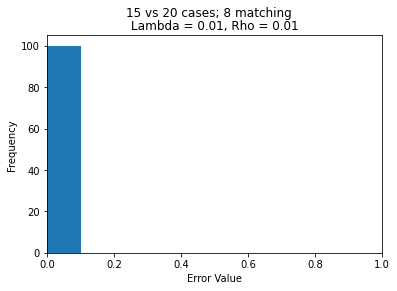

In [186]:
plt.hist(val, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('15 vs 20 cases; 8 matching')
plt.title('Lambda = 0.01, Rho = 0.01')
plt.xlim(0,1)

(0.0, 1.0)

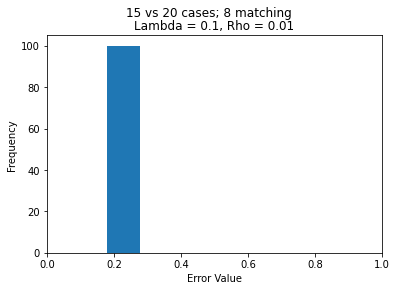

In [187]:
plt.hist(val_1, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('15 vs 20 cases; 8 matching')
plt.title('Lambda = 0.1, Rho = 0.01')
plt.xlim(0,1)

(0.0, 1.0)

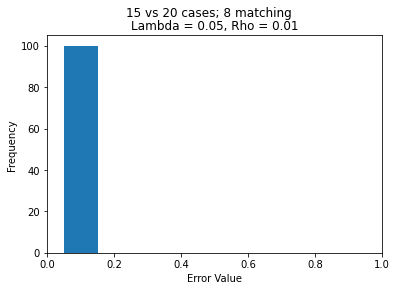

In [188]:
plt.hist(val_2, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('15 vs 20 cases; 8 matching')
plt.title('Lambda = 0.05, Rho = 0.01')
plt.xlim(0,1)

(0.0, 1.0)

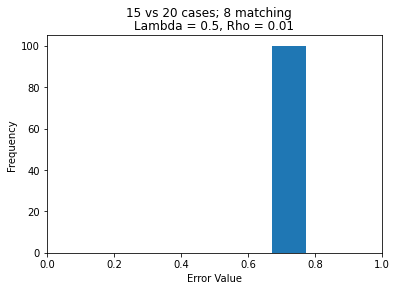

In [189]:
plt.hist(val_3, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('15 vs 20 cases; 8 matching')
plt.title('Lambda = 0.5, Rho = 0.01')
plt.xlim(0,1)